In [38]:
from os import listdir
import pandas as pd 
import re
from collections import Counter
from nltk import tokenize
import matplotlib.pyplot as plt
import seaborn as sns
from stylometry.stylometry.extract import *
import spacy
import en_core_web_sm

# ML
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, ExtraTreesClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import precision_score, recall_score, f1_score

In [2]:
def load_data_to_pandas():
    data = {}
    for directory_name in listdir('articles/'):
        for file_name in listdir('articles/'+directory_name):
            text = ''
            file = open('articles/'+directory_name+"/"+file_name, "r")
            for line in file:
                text += line
            data[directory_name+"/"+file_name] = text
    data_frame = pd.DataFrame(data.items(), columns=['Source', 'Article'])
    return data_frame
df = load_data_to_pandas()
df['Class'] = df['Source'].apply(lambda x: 'YP' if 'YP' in x else 'HQ')

In [3]:
def remove_quotes(article):
    quotes = re.findall("\“.*?\”", article)
    quotes2 = re.findall("\".*?\"", article)
    for quote in quotes:
        article = article.replace(quote, '')
    for quote in quotes2:
        article = article.replace(quote, '')
    return article

def alpha_chars_ratio(article):
    count = 0 
    total = 0
    for char in article:
        total += 1
        if char.isalpha():
            count += 1
    return count/total

def digit_chars_ratio(article):
    count = 0
    total = 0
    for char in article:
        total += 1
        if char.isdigit():
            count += 1
    return count/total

def upper_chars_ratio(article):
    count = 0 
    total = 0 
    for char in article:
        total += 1
        if char.isupper():
            count += 1
    return count/total

def white_chars_ratio(article):
    count = 0 
    total = 0 
    for char in article:
        total += 1
        if char.isspace():
            count += 1
    return count/total

def counter_of_words(article):
    article = article.lower()
    article = re.sub("[^\w ]", "", article)
    words = article.split(" ")
    return Counter(words)

def total_number_of_words(article):
    counter = counter_of_words(article)
    total = 0
    for item, value in counter.items():
        total += value
    return total

def size_of_vocabulary(article):
    counter = counter_of_words(article)
    return len(list(counter.keys()))

def type_token_ratio(article): # better solution 
    return size_of_vocabulary(article)/total_number_of_words(article)

# words occuring once
def hapax_legomena(article):
    counter = counter_of_words(article)
    total = 0 
    for item, value in counter.items():
        if value == 1:
            total += 1
    return total

def hapax_dislegomena(article):
    counter = counter_of_words(article)
    total = 0 
    for item, value in counter.items():
        if value == 2:
            total += 1
    return total

def average_word_length(article): # there is better solution
    counter = counter_of_words(article)
    total_length = 0
    size = len(list(counter.keys()))
    for word in counter.keys():
        total_length += len(word)
    return total_length/size

def average_sentence_char_length(article):
    sentences = tokenize.sent_tokenize(article)
    size = len(sentences)
    total = 0 
    for sentence in sentences:
        for char in sentence:
            total += 1
    return total/size

def average_sentence_word_length(article):
    sentences = tokenize.sent_tokenize(article)
    size = len(sentences)
    total = 0
    for sentence in sentences:
        counter = counter_of_words(sentence)
        for item, value in counter.items():
            total += value
    return total/size

def lexical_diversity(article):
    instance = StyloDocument(text=article)
    return instance.type_token_ratio()

def mean_word_length(article):
    instance = StyloDocument(text=article)
    return instance.mean_word_len()

def mean_paragraph_len(article):
    instance = StyloDocument(text=article)
    return instance.mean_paragraph_len()

def exclamation_mark_rate(article):
    instance = StyloDocument(text=article)
    return instance.term_per_thousand('!')

def question_mark_rate(article):
    instance = StyloDocument(text=article)
    return instance.term_per_thousand('?')

def number_of_adverbs(article):
    text = nltk.word_tokenize(article)
    fdist = FreqDist(article)
    count = 0
    for tag in nltk.pos_tag(text):
        if tag[1] == 'RB':
            count += 1
    return count/fdist.N()

def number_of_adjectives(article):
    text = nltk.word_tokenize(article)
    fdist = FreqDist(article)
    count = 0
    for tag in nltk.pos_tag(text):
        if tag[1] == 'JJ':
            count += 1
    return count/fdist.N()

def number_of_nouns(article):
    text = nltk.word_tokenize(article)
    fdist = FreqDist(article)
    count = 0
    for tag in nltk.pos_tag(text):
        if tag[1] == 'NN':
            count += 1
    return count/fdist.N()

def number_of_prepositions(article):
    text = nltk.word_tokenize(article)
    fdist = FreqDist(article)
    count = 0
    for tag in nltk.pos_tag(text):
        if tag[1] == 'IN':
            count += 1
    return count/fdist.N()

def number_of_conjuctions(article):
    text = nltk.word_tokenize(article)
    fdist = FreqDist(article)
    count = 0
    for tag in nltk.pos_tag(text):
        if tag[1] == 'CC':
            count += 1
    return count/fdist.N()

def number_of_verbs(article):
    text = nltk.word_tokenize(article)
    fdist = FreqDist(article)
    count = 0
    for tag in nltk.pos_tag(text):
        if 'VB' in tag[1] :
            count += 1
    return count/fdist.N()

def adj_adv(article):
    text = nltk.word_tokenize(article)
    fdist = FreqDist(article)
    count = 0
    for tag in nltk.pos_tag(text):
        if tag[1] == 'JJ' or tag[1] =='RB':
            count += 1
    return count/fdist.N()

def number_of_quotes(article):
    result = re.findall("\“.*?\”", article)
    diff_result = re.findall("\".*?\"", article)
    return len(result)+len(diff_result)

def number_of_ne(article):
    nlp = en_core_web_sm.load()
    spacy_article = nlp(article)
    fdist = FreqDist(article)
    return len(spacy_article.ents)/fdist.N()



In [4]:
df['removed-quotes'] = df['Article'].apply(remove_quotes)
df['quotes-rate'] = df['Article'].apply(number_of_quotes)
df['alpha-chars-ratio'] = df['removed-quotes'].apply(alpha_chars_ratio)
df['digit-chars-ratio'] = df['removed-quotes'].apply(digit_chars_ratio)
df['upper-chars-ratio'] = df['removed-quotes'].apply(upper_chars_ratio)
df['white-chars-ratio'] = df['removed-quotes'].apply(white_chars_ratio)
df['number-of-words'] = df['removed-quotes'].apply(total_number_of_words)
df['size-of-vocabulary'] = df['removed-quotes'].apply(size_of_vocabulary)
df['type-token-ratio'] = df['removed-quotes'].apply(lexical_diversity)
df['hapax-legomena'] = df['removed-quotes'].apply(hapax_legomena)
df['hapax-dislegomena'] = df['removed-quotes'].apply(hapax_dislegomena)
df['mean-word-length'] = df['removed-quotes'].apply(mean_word_length)
df['mean-sentence-char-length'] = df['removed-quotes'].apply(average_sentence_char_length)
df['mean-sentence-word-length'] = df['removed-quotes'].apply(average_sentence_word_length)
df['mean-paragraph-length'] = df['removed-quotes'].apply(mean_paragraph_len)
df['exclamation_mark_rate'] = df['removed-quotes'].apply(exclamation_mark_rate)
df['question-mark-rate'] = df['removed-quotes'].apply(question_mark_rate)
df['adverbs-rate'] = df['removed-quotes'].apply(number_of_adverbs)
df['adjectives-rate'] = df['removed-quotes'].apply(number_of_adjectives)
df['nouns-rate'] = df['removed-quotes'].apply(number_of_nouns)
df['prepositions-rate'] = df['removed-quotes'].apply(number_of_prepositions)
df['conjuctions-rate'] = df['removed-quotes'].apply(number_of_conjuctions)
df['verb-rate'] = df['removed-quotes'].apply(number_of_verbs)
df['adjectivs-adverbs-rate'] = df['removed-quotes'].apply(adj_adv)
df['named-entites-count'] = df['removed-quotes'].apply(number_of_ne)


In [5]:
df

,Source,Article,Class,removed-quotes,quotes-rate,alpha-chars-ratio,digit-chars-ratio,upper-chars-ratio,white-chars-ratio,number-of-words,...,exclamation_mark_rate,question-mark-rate,adverbs-rate,adjectives-rate,nouns-rate,prepositions-rate,conjuctions-rate,verb-rate,adjectivs-adverbs-rate,named-entites-count
0,kanye/YPthe sun,A SOBBING Kanye West revealed he stopped Kim K...,YP,A SOBBING Kanye West revealed he stopped Kim K...,12,0.775218,0.012289,0.029186,0.187404,320,...,0.0,0.000000,0.006144,0.011777,0.026114,0.023041,0.003072,0.031234,0.017921,0.018945
1,kanye/HQguardian,Rapper’s rambling and emotional address – whi...,HQ,Rapper’s rambling and emotional address – whi...,16,0.795803,0.003331,0.017655,0.180213,506,...,0.0,0.000000,0.004997,0.011326,0.028981,0.019654,0.003997,0.034977,0.016322,0.009660
2,kanye/HQbbc,Kanye West has officially launched his campaig...,HQ,Kanye West has officially launched his campaig...,14,0.785953,0.009365,0.025084,0.179933,486,...,0.0,5.357143,0.004682,0.012709,0.023746,0.021739,0.004682,0.034114,0.017391,0.014047
3,kanye/HQwashington post,"COLUMBIA, S.C. — Rapper Kanye West, in his fir...",HQ,"COLUMBIA, S.C. — Rapper Kanye West, in his fir...",2,0.810364,0.005513,0.025358,0.162073,278,...,0.0,0.000000,0.003308,0.010474,0.029768,0.019294,0.003308,0.030320,0.013782,0.012679
4,kanye/YPdaily mail,\nUS rapper Kanye West broke down in tears on...,YP,\nUS rapper Kanye West broke down in tears on...,6,0.787055,0.005825,0.031715,0.181877,258,...,0.0,0.000000,0.006472,0.009709,0.025243,0.020065,0.003883,0.031068,0.016181,0.016828
5,kanye/YPny post,\nKanye West — who claims to be running for p...,YP,\nKanye West — who claims to be running for p...,9,0.780520,0.013342,0.028019,0.182121,248,...,0.0,0.000000,0.005337,0.008672,0.028019,0.021348,0.004003,0.034690,0.014009,0.016011
6,kanye/YPirish post,KANYE WEST officially launched his bid to beco...,YP,KANYE WEST officially launched his bid to beco...,15,0.786900,0.007627,0.030507,0.182144,366,...,0.0,0.000000,0.009421,0.013010,0.025572,0.019740,0.004486,0.028712,0.022432,0.014356
7,kanye/HQdw,US rapper Kanye West has held his first electi...,HQ,US rapper Kanye West has held his first electi...,3,0.815586,0.001785,0.020226,0.161214,256,...,0.0,0.000000,0.005354,0.013682,0.026770,0.017847,0.004759,0.029149,0.019036,0.012493
8,hamilton/YPthe sun,WHAT ARE LEW DOING? Lewis Hamilton slammed by ...,YP,WHAT ARE LEW DOING? Lewis Hamilton slammed by ...,21,0.788196,0.004109,0.038849,0.185282,425,...,0.0,2.053388,0.004856,0.011580,0.027643,0.020919,0.005230,0.029884,0.016436,0.012701
9,hamilton/HQbbc,Coronavirus: Lewis Hamilton deletes vaccine co...,HQ,Coronavirus: Lewis Hamilton deletes vaccine co...,10,0.801660,0.004149,0.026971,0.174274,382,...,0.0,6.976744,0.002490,0.007469,0.029046,0.021577,0.004979,0.029046,0.009959,0.013278


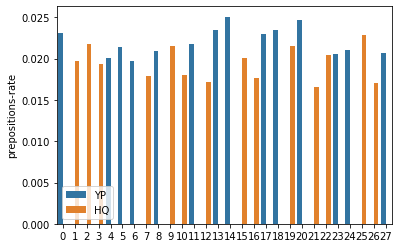

In [69]:
sns.barplot(df.index, df['prepositions-rate'], hue=df.Class)
plt.legend(loc='lower left')


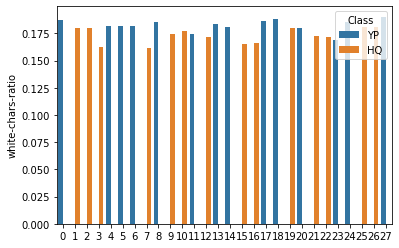

In [68]:
sns.barplot(df.index, df['white-chars-ratio'], hue=df.Class)
plt.savefig('whitechars.png')

In [8]:
test1 = StyloDocument(file_name='articles/kanye/YPthe sun')

In [9]:
test1.text_output()


##############################################

Name:  articles/kanye/YPthe sun

>>> Phraseology Analysis <<<

Lexical diversity        : 49.036777583187394
Mean Word Length         : 5.160714285714286
Mean Sentence Length     : 15.833333333333334
STDEV Sentence Length    : 7.891275069481625
Mean paragraph Length    : 19.791666666666668
Document Length          : 2675

>>> Punctuation Analysis (per 1000 tokens) <<<

Commas                   : 45.53415061295972
Semicolons               : 0.0
Quotations               : 0.0
Exclamations             : 1.7513134851138354
Colons                   : 8.756567425569177
Hyphens                  : 3.502626970227671
Double Hyphens           : 0.0

>>> Lexical Usage Analysis (per 1000 tokens) <<<

and                      : 12.259194395796847
but                      : 3.502626970227671
however                  : 0.0
if                       : 1.7513134851138354
that                     : 7.005253940455342
more                     : 0.0
must       

In [10]:
df_for_saving = df.drop('Article', axis=1).drop('removed-quotes', axis=1).drop('Source', axis=1)

In [11]:
df_for_saving

,Class,quotes-rate,alpha-chars-ratio,digit-chars-ratio,upper-chars-ratio,white-chars-ratio,number-of-words,size-of-vocabulary,type-token-ratio,hapax-legomena,...,exclamation_mark_rate,question-mark-rate,adverbs-rate,adjectives-rate,nouns-rate,prepositions-rate,conjuctions-rate,verb-rate,adjectivs-adverbs-rate,named-entites-count
0,YP,12,0.775218,0.012289,0.029186,0.187404,320,195,54.838710,153,...,0.0,0.000000,0.006144,0.011777,0.026114,0.023041,0.003072,0.031234,0.017921,0.018945
1,HQ,16,0.795803,0.003331,0.017655,0.180213,506,274,49.649123,212,...,0.0,0.000000,0.004997,0.011326,0.028981,0.019654,0.003997,0.034977,0.016322,0.009660
2,HQ,14,0.785953,0.009365,0.025084,0.179933,486,278,51.428571,214,...,0.0,5.357143,0.004682,0.012709,0.023746,0.021739,0.004682,0.034114,0.017391,0.014047
3,HQ,2,0.810364,0.005513,0.025358,0.162073,278,183,57.716049,139,...,0.0,0.000000,0.003308,0.010474,0.029768,0.019294,0.003308,0.030320,0.013782,0.012679
4,YP,6,0.787055,0.005825,0.031715,0.181877,258,167,58.163265,130,...,0.0,0.000000,0.006472,0.009709,0.025243,0.020065,0.003883,0.031068,0.016181,0.016828
5,YP,9,0.780520,0.013342,0.028019,0.182121,248,155,57.295374,116,...,0.0,0.000000,0.005337,0.008672,0.028019,0.021348,0.004003,0.034690,0.014009,0.016011
6,YP,15,0.786900,0.007627,0.030507,0.182144,366,236,62.593516,197,...,0.0,0.000000,0.009421,0.013010,0.025572,0.019740,0.004486,0.028712,0.022432,0.014356
7,HQ,3,0.815586,0.001785,0.020226,0.161214,256,182,63.698630,149,...,0.0,0.000000,0.005354,0.013682,0.026770,0.017847,0.004759,0.029149,0.019036,0.012493
8,YP,21,0.788196,0.004109,0.038849,0.185282,425,264,58.110883,211,...,0.0,2.053388,0.004856,0.011580,0.027643,0.020919,0.005230,0.029884,0.016436,0.012701
9,HQ,10,0.801660,0.004149,0.026971,0.174274,382,190,45.581395,133,...,0.0,6.976744,0.002490,0.007469,0.029046,0.021577,0.004979,0.029046,0.009959,0.013278


In [12]:
train, test = train_test_split(df_for_saving, test_size=0.3)

In [13]:
Y_train = train['Class']
Y_test = test['Class']
X_train = train.drop('Class', axis=1)
X_test = test.drop('Class', axis=1)


In [14]:
clf = AdaBoostClassifier(n_estimators=100).fit(X_train, Y_train)

In [15]:
clf.score(X_test, Y_test)

0.7777777777777778

In [16]:
NN = MLPClassifier(hidden_layer_sizes=(15,)).fit(X_train, Y_train)

In [17]:
NN.score(X_test, Y_test)

0.7777777777777778

In [18]:
rf = RandomForestClassifier(n_estimators=100).fit(X_train, Y_train)

In [19]:
rf.score(X_test, Y_test)

0.5555555555555556

In [20]:
et = ExtraTreesClassifier(n_estimators=100).fit(X_train, Y_train)


In [21]:
et.score(X_test, Y_test)

0.7777777777777778

In [22]:
features = rf.feature_importances_
features
for smth in zip(X_train.columns, features):
    print(smth)

('quotes-rate', 0.020298160173160173)
('alpha-chars-ratio', 0.09486514164947607)
('digit-chars-ratio', 0.03158958078958078)
('upper-chars-ratio', 0.02644078452411786)
('white-chars-ratio', 0.07828319512978603)
('number-of-words', 0.02458291430791431)
('size-of-vocabulary', 0.04541815911010987)
('type-token-ratio', 0.015050128112628115)
('hapax-legomena', 0.042579791060310554)
('hapax-dislegomena', 0.012921666990416992)
('mean-word-length', 0.042394176810843474)
('mean-sentence-char-length', 0.06316301646585738)
('mean-sentence-word-length', 0.040440476236526024)
('mean-paragraph-length', 0.04869720002220003)
('exclamation_mark_rate', 0.0)
('question-mark-rate', 0.013976523476523476)
('adverbs-rate', 0.05658279267029267)
('adjectives-rate', 0.04257575933766411)
('nouns-rate', 0.04992972263426809)
('prepositions-rate', 0.11824046185146024)
('conjuctions-rate', 0.033039336285007284)
('verb-rate', 0.027893550959622385)
('adjectivs-adverbs-rate', 0.016800998559521284)
('named-entites-count'

<BarContainer object of 24 artists>

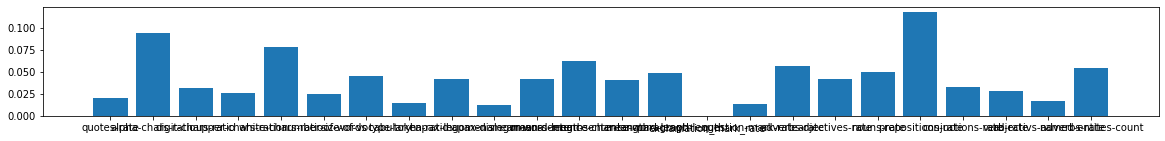

In [23]:
plt.figure(figsize=(20, 2))
plt.bar(X_train.columns, features)

In [24]:
sel = SelectFromModel(ExtraTreesClassifier(n_estimators = 100))
sel.fit(X_train, Y_train)

SelectFromModel(estimator=ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
        max_features=None, norm_order=1, prefit=False, threshold=None)

In [25]:
selected_feat = X_train.columns[(sel.get_support())]

In [26]:
smth = ['Class']
for sel in selected_feat:
    smth += [sel]
smth

['Class',
 'alpha-chars-ratio',
 'digit-chars-ratio',
 'white-chars-ratio',
 'mean-sentence-char-length',
 'mean-sentence-word-length',
 'mean-paragraph-length',
 'question-mark-rate',
 'adverbs-rate',
 'nouns-rate',
 'prepositions-rate',
 'conjuctions-rate',
 'named-entites-count']

In [27]:
df_ml = df_for_saving[df_for_saving.columns.intersection(smth)]

In [28]:
df_ml

,Class,alpha-chars-ratio,digit-chars-ratio,white-chars-ratio,mean-sentence-char-length,mean-sentence-word-length,mean-paragraph-length,question-mark-rate,adverbs-rate,nouns-rate,prepositions-rate,conjuctions-rate,named-entites-count
0,YP,0.775218,0.012289,0.187404,120.000000,20.812500,16.550000,0.000000,0.006144,0.026114,0.023041,0.003072,0.018945
1,HQ,0.795803,0.003331,0.180213,123.083333,21.333333,31.875000,0.000000,0.004997,0.028981,0.019654,0.003997,0.009660
2,HQ,0.785953,0.009365,0.179933,112.846154,19.384615,21.826087,5.357143,0.004682,0.023746,0.021739,0.004682,0.014047
3,HQ,0.810364,0.005513,0.162073,127.857143,20.285714,31.444444,0.000000,0.003308,0.029768,0.019294,0.003308,0.012679
4,YP,0.787055,0.005825,0.181877,152.600000,26.500000,21.833333,0.000000,0.006472,0.025243,0.020065,0.003883,0.016828
5,YP,0.780520,0.013342,0.182121,134.181818,23.090909,19.153846,0.000000,0.005337,0.028019,0.021348,0.004003,0.016011
6,YP,0.786900,0.007627,0.182144,136.187500,22.625000,16.714286,0.000000,0.009421,0.025572,0.019740,0.004486,0.014356
7,HQ,0.815586,0.001785,0.161214,110.333333,17.333333,32.375000,0.000000,0.005354,0.026770,0.017847,0.004759,0.012493
8,YP,0.788196,0.004109,0.185282,155.176471,25.882353,18.291667,2.053388,0.004856,0.027643,0.020919,0.005230,0.012701
9,HQ,0.801660,0.004149,0.174274,112.904762,19.047619,20.736842,6.976744,0.002490,0.029046,0.021577,0.004979,0.013278


In [29]:
train, test = train_test_split(df_ml, test_size=0.35)
Y_train = train['Class']
Y_test = test['Class']
X_train = train.drop('Class', axis=1)
X_test = test.drop('Class', axis=1)

In [30]:
clf = ExtraTreesClassifier(n_estimators=100).fit(X_train, Y_train)
clf.score(X_test, Y_test)

0.9

In [65]:
Y_pred = clf.predict(X_test)
print('Precision:', precision_score(Y_test.values, Y_pred, pos_label='YP'))
print('Recall:', recall_score(Y_test, Y_pred, pos_label='YP'))
print('F1:', f1_score(Y_test, Y_pred, pos_label='YP'))


Precision: 1.0
Recall: 0.8
F1: 0.888888888888889


In [31]:
features = clf.feature_importances_
features
for pair in sorted(zip(X_train.columns, features)):
    print(pair)

('adverbs-rate', 0.021755142461024814)
('alpha-chars-ratio', 0.1164355248963092)
('conjuctions-rate', 0.046678068300617326)
('digit-chars-ratio', 0.0385064015505192)
('mean-paragraph-length', 0.1298044475495455)
('mean-sentence-char-length', 0.07363565755232421)
('mean-sentence-word-length', 0.06945894954718483)
('named-entites-count', 0.039146997519546534)
('nouns-rate', 0.0199996854996855)
('prepositions-rate', 0.17307240145475433)
('question-mark-rate', 0.05276707080138452)
('white-chars-ratio', 0.21873965286710395)


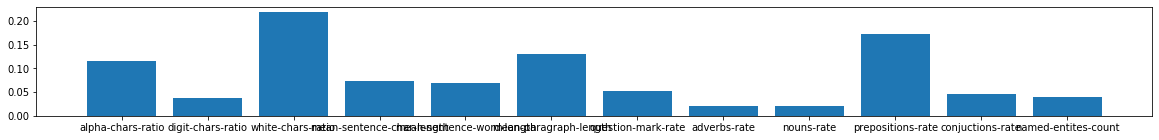

In [66]:
plt.figure(figsize=(20, 2))
plt.bar(X_train.columns, features)
plt.savefig('importance.png')

In [33]:
smth += ['Source']
smth

['Class',
 'alpha-chars-ratio',
 'digit-chars-ratio',
 'white-chars-ratio',
 'mean-sentence-char-length',
 'mean-sentence-word-length',
 'mean-paragraph-length',
 'question-mark-rate',
 'adverbs-rate',
 'nouns-rate',
 'prepositions-rate',
 'conjuctions-rate',
 'named-entites-count',
 'Source']

In [34]:
df_fingerprint = df[df.columns.intersection(smth)]
df_fingerprint

,Source,Class,alpha-chars-ratio,digit-chars-ratio,white-chars-ratio,mean-sentence-char-length,mean-sentence-word-length,mean-paragraph-length,question-mark-rate,adverbs-rate,nouns-rate,prepositions-rate,conjuctions-rate,named-entites-count
0,kanye/YPthe sun,YP,0.775218,0.012289,0.187404,120.000000,20.812500,16.550000,0.000000,0.006144,0.026114,0.023041,0.003072,0.018945
1,kanye/HQguardian,HQ,0.795803,0.003331,0.180213,123.083333,21.333333,31.875000,0.000000,0.004997,0.028981,0.019654,0.003997,0.009660
2,kanye/HQbbc,HQ,0.785953,0.009365,0.179933,112.846154,19.384615,21.826087,5.357143,0.004682,0.023746,0.021739,0.004682,0.014047
3,kanye/HQwashington post,HQ,0.810364,0.005513,0.162073,127.857143,20.285714,31.444444,0.000000,0.003308,0.029768,0.019294,0.003308,0.012679
4,kanye/YPdaily mail,YP,0.787055,0.005825,0.181877,152.600000,26.500000,21.833333,0.000000,0.006472,0.025243,0.020065,0.003883,0.016828
5,kanye/YPny post,YP,0.780520,0.013342,0.182121,134.181818,23.090909,19.153846,0.000000,0.005337,0.028019,0.021348,0.004003,0.016011
6,kanye/YPirish post,YP,0.786900,0.007627,0.182144,136.187500,22.625000,16.714286,0.000000,0.009421,0.025572,0.019740,0.004486,0.014356
7,kanye/HQdw,HQ,0.815586,0.001785,0.161214,110.333333,17.333333,32.375000,0.000000,0.005354,0.026770,0.017847,0.004759,0.012493
8,hamilton/YPthe sun,YP,0.788196,0.004109,0.185282,155.176471,25.882353,18.291667,2.053388,0.004856,0.027643,0.020919,0.005230,0.012701
9,hamilton/HQbbc,HQ,0.801660,0.004149,0.174274,112.904762,19.047619,20.736842,6.976744,0.002490,0.029046,0.021577,0.004979,0.013278


In [35]:
corrMatrix = df.corr()

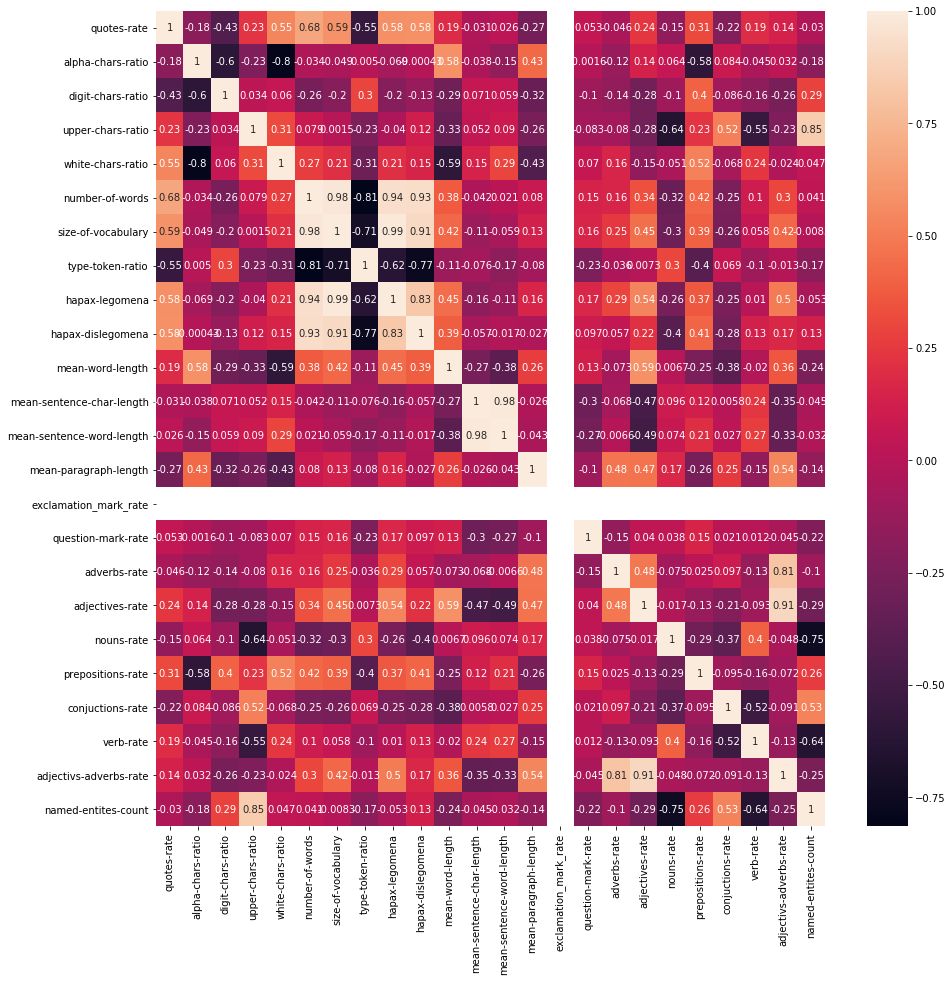

In [36]:
plt.figure(figsize=(15,15))
sns.heatmap(corrMatrix, annot=True)

In [37]:
len(X_test)

10